In [7]:
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k
License(s): other
100% 1.62G/1.62G [00:57<00:00, 31.6MB/s]
100% 1.62G/1.62G [00:57<00:00, 30.5MB/s]


In [8]:
import zipfile

dataset_zip = "ocular-disease-recognition-odir5k.zip"
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("ocular-disease-recognition-odir5k")

print("Files extracted successfully!")


Files extracted successfully!


In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv("/content/ocular-disease-recognition-odir5k/full_df.csv")
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [12]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [13]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [14]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [15]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [16]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [17]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [18]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [19]:
print(len(cataract),len(normal))

594 500


In [20]:
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/content/ocular-disease-recognition-odir5k/preprocessed_images"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue

        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [21]:
dataset = create_dataset(cataract,1)
len(dataset)

100%|██████████| 594/594 [00:01<00:00, 372.33it/s]


588

In [22]:
dataset = create_dataset(normal,0)
len(dataset)

100%|██████████| 500/500 [00:01<00:00, 282.08it/s]


1088

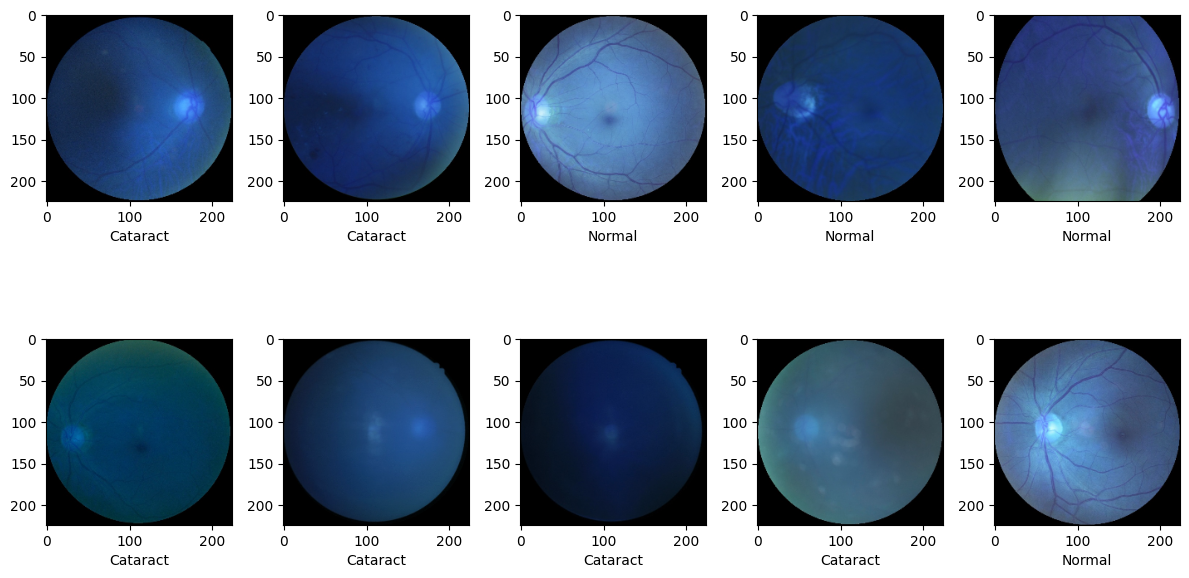

In [23]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

In [24]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

**Resnet50**

In [26]:
from tensorflow.keras.applications.resnet50 import ResNet50
rnet = ResNet50(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [27]:
for layer in rnet.layers:
    layer.trainable = False

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model2 = Sequential()
model2.add(rnet)
model2.add(Flatten())
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         100,353 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,688,065 (90.36 MB)

 Trainable params: 100,353 (392.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [29]:
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    "rnet50.h5",
    monitor="val_accuracy",  # Use "val_accuracy" instead of "val_acc" for TensorFlow 2.x
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    save_freq="epoch"  # Replace 'period=1' with 'save_freq="epoch"'
)

earlystop = EarlyStopping(
    monitor="val_accuracy",  # Use "val_accuracy"
    patience=5,
    verbose=1
)


In [33]:
history2 = model2.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8153 - loss: 1.3943
Epoch 1: val_accuracy improved from -inf to 0.94037, saving model to rnet50.h5


28/28 ━━━━━━━━━━━━━━━━━━━━ 225s 8s/step - accuracy: 0.8178 - loss: 1.3854 - val_accuracy: 0.9404 - val_loss: 0.6209
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9600 - loss: 0.3321
Epoch 2: val_accuracy improved from 0.94037 to 0.94495, saving model to rnet50.h5


28/28 ━━━━━━━━━━━━━━━━━━━━ 231s 7s/step - accuracy: 0.9602 - loss: 0.3290 - val_accuracy: 0.9450 - val_loss: 0.6975
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9881 - loss: 0.0509
Epoch 3: val_accuracy improved from 0.94495 to 0.96330, saving model to rnet50.h5


28/28 ━━━━━━━━━━━━━━━━━━━━ 191s 7s/step - accuracy: 0.9880 - loss: 0.0516 - val_accuracy: 0.9633 - val_loss: 0.4633
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9733 - loss: 0.1523
Epoch 4: val_accuracy did not improve from 0.96330
28/28 ━━━━━━━━━━━━━━━━━━━━ 184s 7s/step - accuracy: 0.9735 - loss: 0.1505 - val_accuracy: 0.9312 - val_loss: 0.8645
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9916 - loss: 0.0185
Epoch 5: val_accuracy did not improve from 0.96330
28/28 ━━━━━━━━━━━━━━━━━━━━ 201s 7s/step - accuracy: 0.9917 - loss: 0.0184 - val_accuracy: 0.9450 - val_loss: 0.5582
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 1.0712e-04
Epoch 6: val_accuracy did not improve from 0.96330
28/28 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - accuracy: 1.0000 - loss: 1.0558e-04 - val_accuracy: 0.9450 - val_loss: 0.5753
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 2.5203e-05
Epoch 7: val_accuracy did not improve f

In [34]:
loss,accuracy = model2.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9296 - loss: 0.7603
loss: 0.5732606053352356
Accuracy: 0.9449541568756104


In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred2 = (model2.predict(x_test) > 0.5).astype("int32")
accuracy_score(y_test, y_pred2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step


0.944954128440367

In [36]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       113
           1       0.93      0.96      0.94       105

    accuracy                           0.94       218
   macro avg       0.94      0.95      0.94       218
weighted avg       0.95      0.94      0.94       218



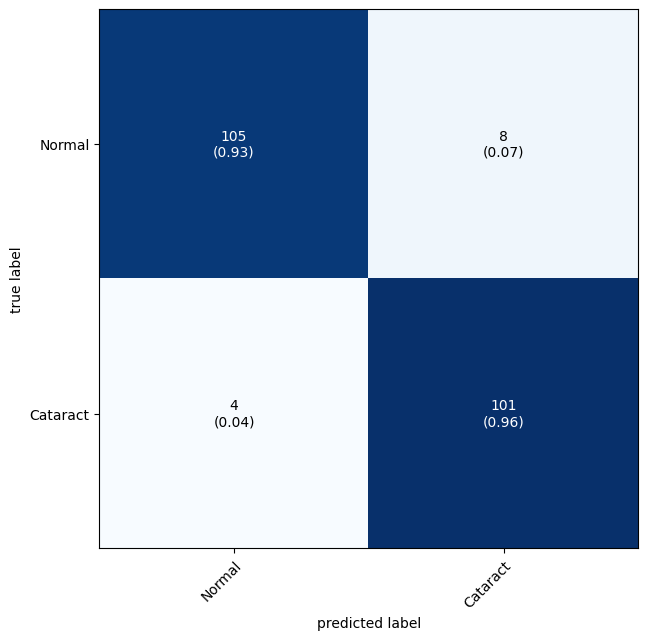

In [37]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred2)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

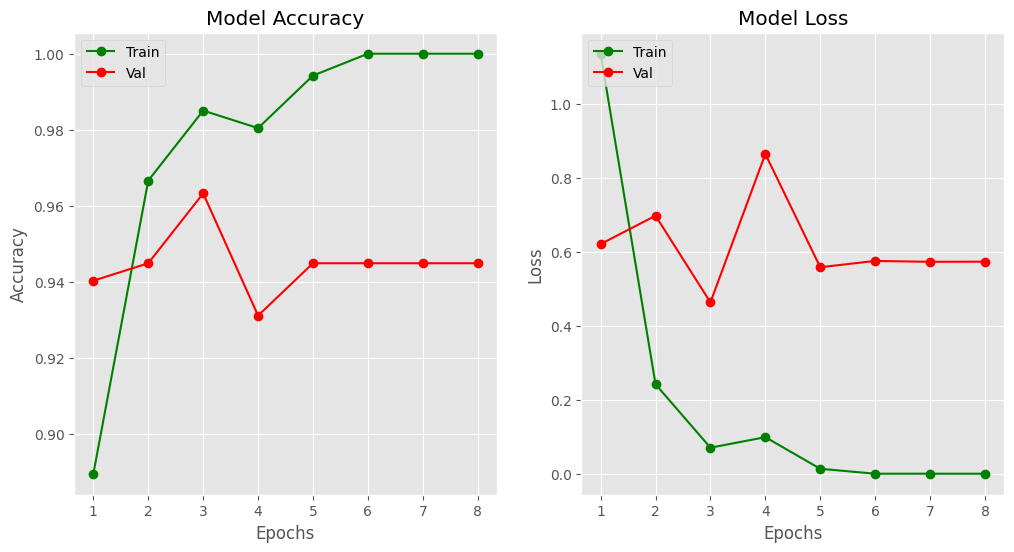

In [39]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))

# Adjust epochs to match the length of history
epochs = range(1, len(history2.history["accuracy"]) + 1)

# Plot Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, history2.history["accuracy"], "go-")
plt.plot(epochs, history2.history["val_accuracy"], "ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Val"], loc="upper left")

# Plot Loss
plt.subplot(1,2,2)
plt.plot(epochs, history2.history["loss"], "go-")
plt.plot(epochs, history2.history["val_loss"], "ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Val"], loc="upper left")

plt.show()


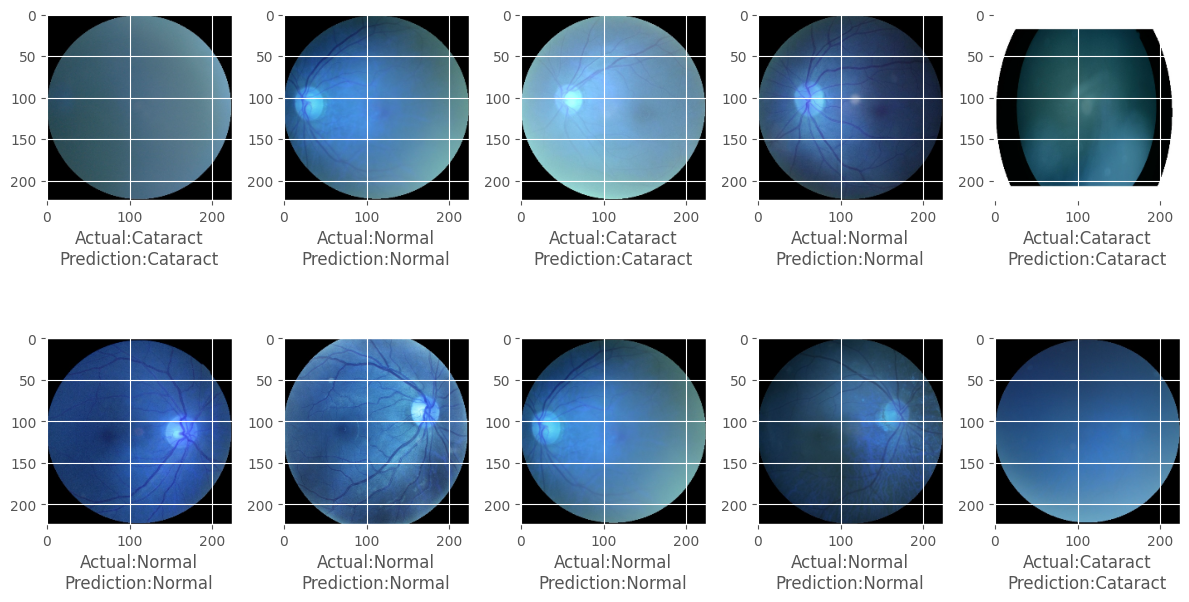

In [40]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred2[sample]

    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"

    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()